In [175]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd

In [176]:
cid = '0e89af2b73df4dbda292f73e8a4beed9'
secret = '2955b48e6de24229acc552f0ceddd188'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [188]:
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        #artist_info = sp.artist(artist_id)
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        #playlist_features["genre"] = track["track"]["album"]["genres"]
        
        
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
            
        #genre_feature = sp.artist(playlist_features["artist"])["genres"]
        #for genre in genre_lis[1:]:
           # playlist_features[genre] = artist[genre]
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df


In [189]:
smooth_jazz = call_playlist("spotify", "37i9dQZF1DXdwTUxmGKrdN")
smooth_jazz.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Norman Brown,After The Storm,That's The Way Love Goes,6UkHSbQcqBwWZr98OSELoL,0.631,0.635,7,-10.649,0,0.0285,0.718,0.0771,0.358,97.915,285467,4
1,Boney James,Send One Your Love,"Stop, Look, Listen (To Your Heart)",24Wg5AQK6AaNyZBTpL1unQ,0.575,0.494,11,-12.006,0,0.0346,0.562,0.0741,0.395,84.909,296320,4
2,Carol Albert,Stronger Now,Perfect Sunday,3y9l6PAbOOGYBH1AY4XaTO,0.621,0.650,3,-9.925,1,0.0541,0.925,0.3250,0.433,168.069,243367,4
3,Adam Hawley,Double Vision,Can You Feel It,1mYIkTdWul7A4NYS3cKR2g,0.798,0.599,2,-5.124,1,0.0281,0.242,0.0544,0.776,97.008,251013,4
4,Jackiem Joyner,Babysoul,Elevation,6mpc681Hb9vbr4tFZJ7Jfc,0.785,0.716,4,-5.797,0,0.0462,0.195,0.1650,0.709,100.009,284987,4


In [190]:
heavy_metal = call_playlist("spotify", "37i9dQZF1DX9qNs32fujYe")
heavy_metal.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Lamb of God,State Of Unrest,State Of Unrest,3u4djE2yAEkKMWJEUOOJyT,0.447,0.982,7,-3.820,1,0.0770,0.019800,0.0517,0.3830,94.941,187895,4
1,Heaven Shall Burn,Pillars of Serpents,Pillars of Serpents,42ASpTtai1npURX7qDsteD,0.152,0.948,7,-5.928,1,0.0699,0.003010,0.0601,0.0951,83.345,337992,3
2,Nita Strauss,The Wolf You Feed (feat. Alissa White-Gluz),The Wolf You Feed (feat. Alissa White-Gluz),6P6h9RdPJxPWqFqpLFIYA9,0.352,0.973,7,-3.250,1,0.1190,0.747000,0.4990,0.2380,200.094,234000,4
3,Metallica,Lux Æterna,Lux Æterna,3pwmJJRlr8nXNN9PFD18np,0.386,0.996,11,-2.960,0,0.0754,0.000836,0.1160,0.1880,130.573,205680,4
4,Avatar,The Dirt I'm Buried In,The Dirt I'm Buried In,4sg5Vfd2fM6Y8gMz5VYXz6,0.614,0.899,11,-5.186,0,0.0384,0.585000,0.1140,0.6710,114.932,244598,4


In [191]:
alternative = call_playlist("spotify", "37i9dQZF1EIefLxrHQP8p4")
alternative.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Stone Temple Pilots,Purple (2019 Remaster),Interstate Love Song - 2019 Remaster,6qLEOZvf5gI7kWE63JE7p3,0.215,0.927,9,-7.327,1,0.0452,0.006610,0.1260,0.490,170.814,194853,4
1,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,"Tonight, Tonight - Remastered 2012",7bu0znpSbTks0O6I98ij0W,0.277,0.670,6,-9.381,1,0.0376,0.751000,0.2370,0.217,148.342,254627,4
2,Audioslave,Out of Exile,Be Yourself,3zwmW1gM4E8FlHXV5nE16u,0.423,0.845,11,-3.509,0,0.0559,0.000005,0.2130,0.317,116.602,278973,4
3,Foo Fighters,There Is Nothing Left To Lose,Learn to Fly,5OQsiBsky2k2kDKy2bX2eT,0.465,0.919,4,-4.025,1,0.0408,0.000021,0.2620,0.537,135.997,235293,4
4,Third Eye Blind,Third Eye Blind,How's It Going to Be,3Uvx1TO0Kg5HgGPk58lHXv,0.561,0.593,5,-9.362,1,0.0264,0.001440,0.0967,0.574,80.282,253413,4


In [192]:
pop = call_playlist("spotify", "37i9dQZF1EQncLwOalG3K7")
pop.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Harry Styles,Harry Styles,Sign of the Times,5Ohxk2dO5COHF1krpoPigN,0.516,0.595,5,-4.630,1,0.0313,0,0.109,0.222,119.972,340707,4
1,Zara Larsson,So Good,Lush Life,1rIKgCH4H52lrvDcz50hS8,0.694,0.712,7,-3.923,0,0.0460,0,0.211,0.799,98.023,201122,4
2,Adele,21,Set Fire to the Rain,7j4OmvkjRz0PrjFADlHfQx,0.603,0.670,2,-3.882,0,0.0249,0.000002,0.112,0.446,107.993,242974,4
3,Katy Perry,PRISM,Dark Horse,4jbmgIyjGoXjY01XxatOx6,0.647,0.585,6,-6.123,1,0.0512,0,0.165,0.353,131.934,215672,4
4,Ariana Grande,Dangerous Woman,Side To Side,44ONERBHALxftQNWq6dmyd,0.650,0.736,6,-5.840,0,0.2290,0,0.235,0.612,159.174,226160,4


In [193]:
alt_bar = alternative[["speechiness","danceability", "energy", "valence", "liveness"]].mean()
alt_bar_df = pd.DataFrame(alt_bar)
alt_bar_gr = alt_bar_df.transpose()
alt_bar_gr.head()

,speechiness,danceability,energy,valence,liveness
0,0.042298,0.491,0.75524,0.506444,0.174542


In [194]:
heavy_metal_bar = heavy_metal[["speechiness","danceability", "energy", "valence", "liveness"]].mean()
heavy_metal_df = pd.DataFrame(heavy_metal_bar)
heavy_metal_gr = heavy_metal_df.transpose()
heavy_metal_gr.head()

,speechiness,danceability,energy,valence,liveness
0,0.077692,0.44933,0.88839,0.423715,0.223661


In [195]:
pop_bar = pop[["speechiness","danceability", "energy", "valence", "liveness"]].mean()
pop_bar_df = pd.DataFrame(pop_bar)
pop_bar_gr = pop_bar_df.transpose()
pop_bar_gr.head()

,speechiness,danceability,energy,valence,liveness
0,0.061092,0.69206,0.69056,0.54334,0.169446


In [196]:
jazz = call_playlist("spotify", "37i9dQZF1DX6lttj7ulLd6")
jazz_bar = jazz[["speechiness","danceability", "energy", "valence", "liveness"]].mean()
jazz_bar_df = pd.DataFrame(jazz_bar)
jazz_bar_gr = jazz_bar_df.transpose()
jazz_bar_gr.head()

,speechiness,danceability,energy,valence,liveness
0,0.037054,0.66905,0.59014,0.61905,0.122826


In [197]:
pop_alt_jazz_hm = pd.concat([pop_bar_gr, alt_bar_gr, jazz_bar_gr, heavy_metal_gr], ignore_index = True)

NameError: name 'plot' is not defined

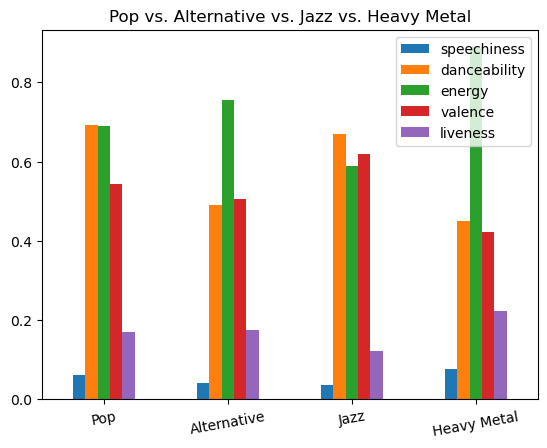

In [198]:
pop_alt_jazz_hm.index = ['Pop', 'Alternative', 'Jazz', 'Heavy Metal']
pop_alt_jazz_hm.plot.bar(rot=10, title = "Pop vs. Alternative vs. Jazz vs. Heavy Metal")
plot.show